In [10]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader

# MNIST dataset torch is working fine. So, to device is not a problem, it also run on cpu

In [17]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [12]:
print(torch.__version__)

1.1.0


In [8]:
train_dataset = torchvision.datasets.MNIST(root='.', 
                                           train=True, 
                                           transform=torchvision.transforms.ToTensor(),  
                                           download=True)

Processing...
Done!


# Works when made download =False and it loads the data

In [34]:
train_dataset = torchvision.datasets.MNIST(root='.', 
                                           train=True, 
                                           transform=torchvision.transforms.ToTensor(),  
                                           download=False)

In [35]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: .
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [18]:
test_dataset = torchvision.datasets.MNIST(root='.', 
                                          train=False, 
                                          transform=transforms.ToTensor())

In [20]:
train_loader = DataLoader(dataset=train_dataset, 
                                           batch_size=3, 
                                           shuffle=True)

# look at one random sample
dataiter = iter(train_loader)
data = dataiter.next()
inputs, targets = data
print(inputs.shape, targets.shape)

torch.Size([3, 1, 28, 28]) torch.Size([3])


In [22]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

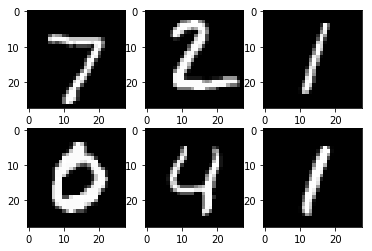

Epoch [1/2], Step [100/600], Loss: 0.2384
Epoch [1/2], Step [200/600], Loss: 0.1746
Epoch [1/2], Step [300/600], Loss: 0.2223
Epoch [1/2], Step [400/600], Loss: 0.1965
Epoch [1/2], Step [500/600], Loss: 0.1092
Epoch [1/2], Step [600/600], Loss: 0.2125
Epoch [2/2], Step [100/600], Loss: 0.1629
Epoch [2/2], Step [200/600], Loss: 0.0668
Epoch [2/2], Step [300/600], Loss: 0.0396
Epoch [2/2], Step [400/600], Loss: 0.1467
Epoch [2/2], Step [500/600], Loss: 0.1492
Epoch [2/2], Step [600/600], Loss: 0.0550
Accuracy of the network on the 10000 test images: 96.98 %


In [23]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = examples.next()

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

# i have stopped it

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
num_epochs = 5
batch_size = 4
learning_rate = 0.001

# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='.', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='.', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

Failed download. Trying https -> http instead. Downloading http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz to .\cifar-10-python.tar.gz


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\2304373\AppData\Local\conda\conda\envs\pytorch\lib\site-packages\torchvision\datasets\utils.py", line 41, in download_url
    urllib.request.urlretrieve(url, fpath)
  File "C:\Users\2304373\AppData\Local\conda\conda\envs\pytorch\lib\urllib\request.py", line 277, in urlretrieve
    block = fp.read(bs)
  File "C:\Users\2304373\AppData\Local\conda\conda\envs\pytorch\lib\http\client.py", line 449, in read
    n = self.readinto(b)
  File "C:\Users\2304373\AppData\Local\conda\conda\envs\pytorch\lib\http\client.py", line 493, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\2304373\AppData\Local\conda\conda\envs\pytorch\lib\socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\2304373\AppData\Local\conda\conda\envs\pytorch\lib\ssl.py", line 1012, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\2304373\AppData\Local\conda\conda\envs\pytorch\lib\ssl.py", line 874, in read
    return se

TypeError: must be str, not list

# we can try this torchtext, spacy

In [26]:
import torchtext

In [29]:
spacy_eng = spacy.load("en")

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import spacy
from torchtext.data import Field, TabularDataset, BucketIterator

In [28]:
import spacy
from torchtext.datasets import Multi30k
from torchtext.data import Field, BucketIterator

In [15]:
import os
user_input="D:\\check\\"
user_input1="trim_check"
if not os.path.exists(os.path.join(user_input, user_input1)):
    os.makedirs(os.path.join(user_input, user_input1))

# Also Check this path D:\check
# Code will run but not here due to Current_Path

In [ ]:
#Code will run but not here due to Current_Path
import os
import pathlib
Current_path=pathlib.Path(__file__).parent.absolute()
user_input=Current_path
user_input1="trimcheck"
if not os.path.exists(os.path.join(user_input, user_input1)):
    os.makedirs(os.path.join(user_input, user_input1))

In [ ]:
import os
import pathlib
Current_path=pathlib.Path(__file__).parent.absolute()
user_input=Current_path
user_input1= ["SourceAudio", "Trimmed_audios"]
if i in user_input1:
    if not os.path.exists(os.path.join(user_input, user_input1[i])):
        os.makedirs(os.path.join(user_input, user_input1[i]))

In [37]:
user_input1= ["SourceAudio", "Trimmed_audios"]
type(user_input1)

list